# Submetric 1: **Safety**

## The importance of safety

Obviously, crime itself is a problem nobody wants to deal with, but *fear of crime* is often overlooked and is as much of a problem. <br />

Fear of crime can be very stressful and mentally taxing. Nobody should have to worry about their kids playing outside or the safety of their belongings when at home.

---

## Pittsburgh Police Arrest Dataset
Includes data from **August 2016** to **March 2022**

We will be using `INCIDENTNEIGHBORHOOD` and querying `OFFENSES` from this dataset to determine which neighborhoods are the safest.

In [66]:
import pandas as pd
import matplotlib.pyplot as plot
dset = pd.read_csv('e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv')
dset.sample(3)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
3346,1978799,15145519,54.0,M,B,2016-12-12T13:50:00,"600 Block 1ST AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"Middle ST & Foreland ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-79.999389,40.454569
4397,1980136,17004102,24.0,M,A,2017-01-07T19:00:00,"Henderson ST & Sandusky CT Pittsburgh, PA 15212",13(a)(32) Paraphernalia - Use or Possession / ...,"Henderson ST & Sandusky CT Pittsburgh, PA 15212",Fineview,1,2509.0,6.0,1.0,-80.005624,40.459227
139,1975338,16163642,24.0,M,B,2016-08-31T00:35:00,"Hamilton AV & East Liberty BL Pittsburgh, PA 1...",13(a)(16) Possession of Controlled Substance /...,"Hamilton AV & East Liberty BL Pittsburgh, PA 1...",Larimer,5,1208.0,9.0,2.0,-79.915771,40.459858


---
## Measuring safety with this data

When sorting neighborhoods by `count` of all crimes, we see the Central Business District (Downtown) way above the rest

In [59]:
df = dset.groupby('INCIDENTNEIGHBORHOOD')['OFFENSES'].describe().sort_values(by='count', ascending=False)
df

,count,unique,top,freq
INCIDENTNEIGHBORHOOD,,,,
Central Business District,3327,1335,9501 Bench Warrant,238
South Side Flats,2861,1412,9015 Failure To Appear/Arrest on Attachment Order,137
Carrick,1969,872,2701 Simple Assault.,170
East Allegheny,1782,689,9015 Failure To Appear/Arrest on Attachment Order,170
Homewood South,1746,804,9015 Failure To Appear/Arrest on Attachment Order,129
...,...,...,...,...
Regent Square,28,23,13(a)(31) Marijuana: Possession Small Amount,3
Central Northside,23,19,9501 Bench Warrant,3
Mt. Oliver Boro,18,16,903 Criminal Conspiracy. / 2701 Simple Assault.,3


But this statistic can be misleading. When we sort Neighborhoods by `count` of **Driving related crimes**, we see South Side Flats above the rest while the Central Business District does't break the top 5

In [54]:
query = dset['OFFENSES'].str.contains('Driving', na=False)
aslt = dset[query].groupby('INCIDENTNEIGHBORHOOD')['OFFENSES'].describe().sort_values(by='count', ascending=False)
aslt.head()

,count,unique,top,freq
INCIDENTNEIGHBORHOOD,,,,
South Side Flats,241,208,3736 Reckless Driving / 3802(a)(1) DUI - Gener...,9
Homewood South,231,189,1543 Driving While Operating Privilege is Susp...,9
Carrick,174,158,1543 Driving While Operating Privilege is Susp...,3
Homewood North,166,148,1543 Driving While Operating Privilege is Susp...,4
Mount Washington,157,136,3714 Careless Driving / 3802(a)(1) DUI - Gener...,7


It is for this reason that I think the best metric to judge Neighborhoods is by the number of `unique` offenses<br />

By using unique offenses as a metric we reduce the affect that population will have on neighborhoods<br /> 
- A neighborhood of 1,000 people with *n* unique offenses will be weighed the same as a neighborhood of 100,000 people with *n* unique offenses.

<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD', ylabel='unique OFFENSES'>

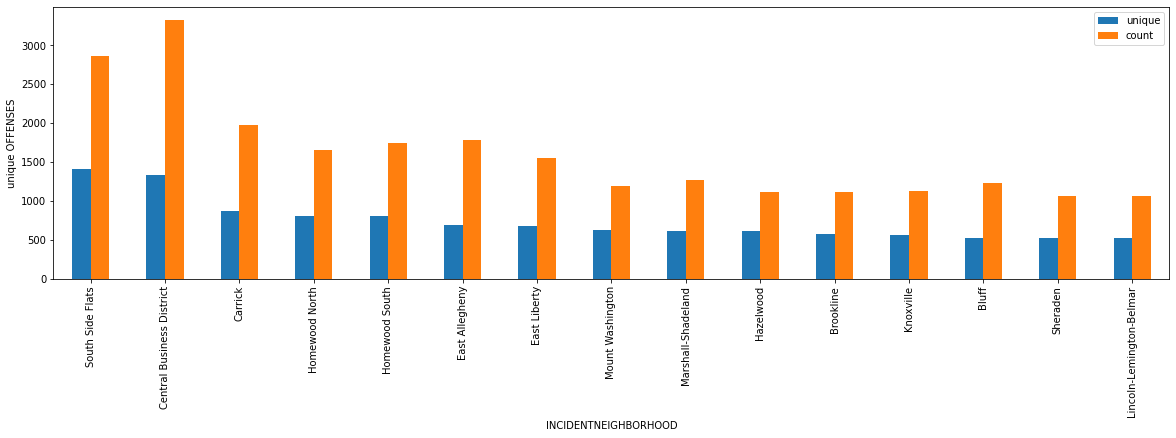

In [102]:
df.sort_values(by='unique', ascending=False).iloc[:15].plot.bar(y=['unique', 'count'], ylabel='unique OFFENSES', figsize=(20,5))

Here are the 15 neighborhoods with the highest amount of unique offenses, along with the total amount of offenses for that neighborhood. <br />

We reach a sweet spot as the number of *totaL* offenses reaches the number of *unique* offenses

<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD', ylabel='unique OFFENSES'>

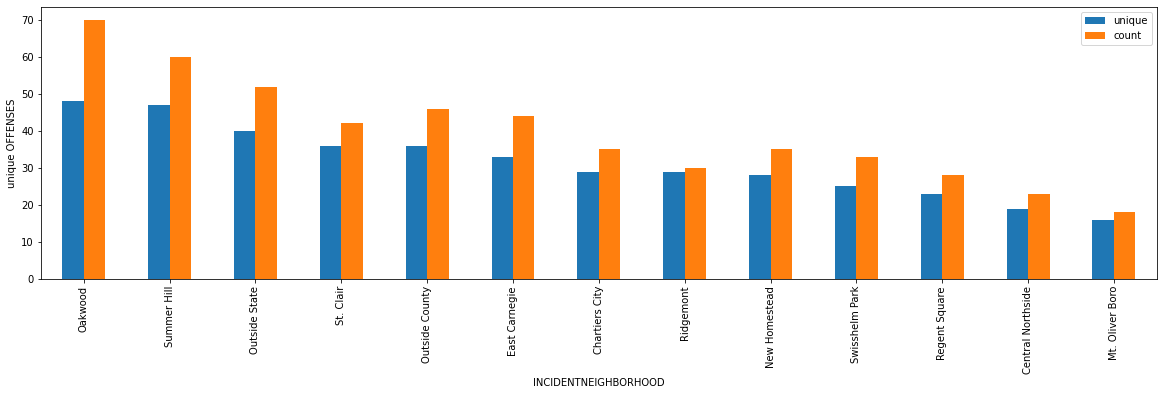

In [109]:
df.sort_values(by='unique', ascending=False).iloc[-15:-2].plot.bar(y=['unique', 'count'], ylabel='unique OFFENSES', figsize=(20,5))

**HERE** is where we'd like to be... There are:
* low *total* offenses
* low *unique* offenses
* small residuals between the two


In [42]:
dset['OFFENSES'].unique()

array(['3929 Retail Theft.',
       '13(a)(16) Possession of Controlled Substance',
       '5503 Disorderly Conduct. / 5505 Public Drunkenness', ...,
       '903 Criminal Conspiracy. / 907 Possessing Instruments of Crime. / 2702 Aggravated Assault. / 2706 Terroristic Threats. / 2902 Unlawful Restraint. / 5104 Resisting Arrest or Other Law Enforcement. / 6106 Firearms not to be Carried without a License.',
       '4106 Access Device Fraud / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4120 Identity Theft / 4914(A) False Identification to Law Enforcement',
       '901 Criminal Attempt / 2702 Aggravated Assault. / 3736 Reckless Driving / 3732.1 Aggravated Assault by Vehicle'],
      dtype=object)